In [49]:
import pandas as pd
import csv
import numpy as np
import statistics as sc
import matplotlib.pyplot as plt
from numpy import percentile
import re

In [2]:
df0=pd.read_csv('positions_sat.csv')
df1=pd.read_csv('labels(dst).csv')
df2=pd.read_csv('solar_wind.csv')
df3=pd.read_csv('sunspots_smooth.csv')

In [34]:
nndf=df2.drop(['period','timedelta','source'], axis=1)


In [21]:
train__a=0
train__b=0
train__c=0
for i in range (len(df2)):
    if(df2['period'][i]=="train_a"):
        train__a=i
    elif(df2['period'][i]=="train_b"):
        train__b=i
    elif(df2['period'][i]=="train_c"):
        train__c=i
print(train__a)
print(train__b)
print(train__c)

1729439
4884479
8392319


In [26]:
print(df2['period'][0])
print(len(df2)-1)

train_a
8392319


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   period        192 non-null    object 
 1   timedelta     192 non-null    object 
 2   smoothed_ssn  192 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


In [19]:
x=df3['timedelta'][1].split()
print(x)
print(len(df3))
sum=0
for i in range (len(df3)):
    if(int(df3['timedelta'][i].split()[0])==0):
        sum+=1
print(sum)

['13', 'days', '00:00:00']
192
3


In [35]:
nndf_new=nndf.dropna()
nndf
print(len(nndf_new))

7571081


In [39]:
indexing_list=[]
for i in nndf:
    indexing_list.append(i)

In [37]:
five_number_summary=[]
# Saved as  : -----
# min
# 1st quartile
# median
# 2nd quartile
# max
for i in nndf_new:
    newfive=[]
    newfive.append(nndf_new[i].min())
    quartiles = percentile(nndf_new[i], [25, 50, 75])
    newfive.append(quartiles[0])
    newfive.append(quartiles[1])
    newfive.append(quartiles[2])
    newfive.append(nndf_new[i].max())
    five_number_summary.append(newfive)
print(five_number_summary)    

[[-54.63, -3.27, -0.67, 2.04, 55.55], [-51.69, -2.46, 0.11, 2.65, 57.6], [-54.84, -1.7, 0.01, 1.7, 57.3], [-89.89, -21.43, 0.16, 21.69, 89.94], [0.0, 123.83, 176.65, 286.62, 360.0], [-54.63, -3.27, -0.67, 2.03, 55.54], [-52.68, -2.39, 0.08, 2.55, 52.91], [-55.69, -1.8, 0.0, 1.79, 52.86], [-89.91, -22.81, 0.05, 23.08, 89.96], [0.0, 124.49, 177.48, 286.83, 360.0], [0.03, 3.66, 4.95, 6.7, 73.69], [0.0, 1.83, 3.39, 5.75, 195.26], [0.0, 358.8, 411.31, 487.4, 1198.49], [0.0, 39791.0, 77374.0, 151222.0, 6223700.0]]


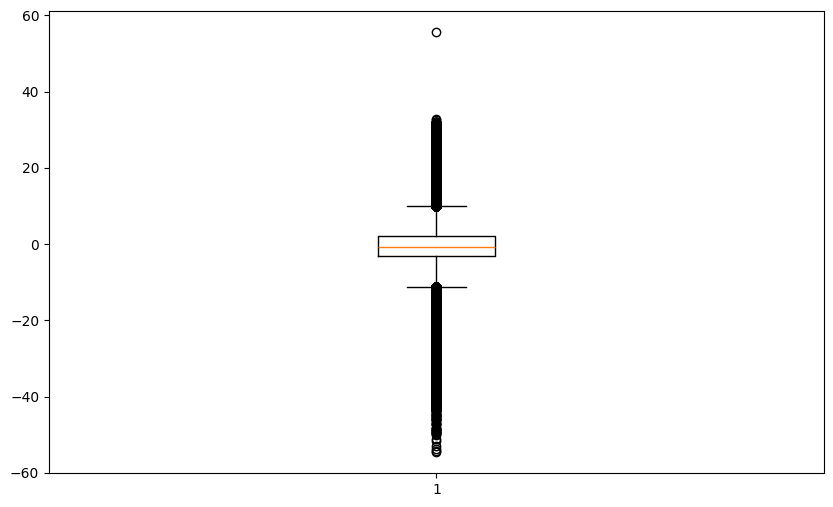

In [48]:
# data=[]
# for i in range(len(indexing_list)):
#     data.append(nndf_new[indexing_list[i]])
# ax = fig.add_axes([0, 0, 1, 1])
# bp = ax.boxplot(data)
# plt.show()
fig = plt.figure(figsize =(10, 6))
plt.boxplot(nndf_new[indexing_list[0]]) # Substitute 0 with i for Box plot analysis of the data
plt.show()

In [50]:
def expand(DF):
    sn=[]
    for i in range(DF.index[0],DF.index[-1]):
        match = re.search(r'\d+', DF['timedelta'][i])
        n = int(match.group())
        match_next = re.search(r'\d+', DF['timedelta'][i + 1])
        n1 = int(match_next.group())
        x = DF['smoothed_ssn'][i]
        for j in range((n1 - n )*1440):
            sn.append(x)

    for i in range(31*1440):
        sn.append(DF['smoothed_ssn'].iloc[-1])
    ssn = pd.DataFrame({'smoothed_ssn': sn})
    return ssn

In [66]:
ssncol_semi=expand(df3)
print(len(ssncol_semi))
print(ssncol_semi)
snc=list(ssncol_semi['smoothed_ssn'])
print(len(snc))

8303040
         smoothed_ssn
0                65.4
1                65.4
2                65.4
3                65.4
4                65.4
...               ...
8303035          42.5
8303036          42.5
8303037          42.5
8303038          42.5
8303039          42.5

[8303040 rows x 1 columns]
8303040


In [67]:
for i in range (0,(len(df2['bx_gse'])-len(ssncol_semi))):
    snc.append(ssncol_semi['smoothed_ssn'][len(ssncol_semi)-1])
print(len(snc))

8392320


In [68]:
dfn=nndf.assign(sunspots_smooth=snc)


Now replacing Nan values with mean and median and analysing the box plot 

In [89]:
colnames=[]
for i in dfn:
    colnames.append(i)
data=[]
for i in range(len(colnames)):
    data.append(dfn[colnames[i]])
print(len(data))
print(len(data[0]))

15
8392320


In [91]:
for i in range (len(data[0])):
    k=0
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])
    k+=1
    if(pd.isna(dfn[colnames[k]][i])):
        dfn[colnames[k]][i]=sc.median(dfn[colnames[k]])

KeyboardInterrupt: 

In [ ]:
def checker(arr):
    cou=0
    for i in arr:
        if(pd.isna(i)):
            cou+=1
    return (f"There are {cou} nan values")
for i in dfn:
    checker(dfn[i])